# Initiate Notebook

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=ff2d70ea5867727c1142d669b8f933fb5a3898a7e714c3b7b28369c715f04fd1
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asadansari","key":"b9e4e5088313565f02378e47711d8aec"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c malware-detection-ga-team

 99% 82.0M/82.7M [00:00<00:00, 146MB/s]
100% 82.7M/82.7M [00:00<00:00, 167MB/s]


In [ ]:
!unzip -u \*.zip 

Archive:  malware-detection-ga-team.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
! find . -name "*.zip" -type f -delete

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb


from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
from scipy import sparse
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn import  linear_model
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import sklearn.model_selection as model_selection
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import gc
gc.enable()

#warnings
import warnings
import time
import sys
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)

# Import Datasets

In [ ]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
print('Download Train and Test Data.\n')
train = reduce_mem_usage(pd.read_csv('train.csv', dtype=dtypes, low_memory=True))
train['MachineIdentifier'] = train.index.astype('uint32')
train

Download Train and Test Data.

Mem. usage decreased to 105.42 Mb (1.0% reduction)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,win8defender,1.1.15100.1,4.18.1806.18062,1.273.512.0,0,7.0,0,NaN,2558.0,2.0,2.0,1,29,13094.0,18.0,35.0,-85,windows10,x86,10.0.0.0,16299,256,rs3,16299.15.x86fre.rs3_release.170928-1534,Pro,1.0,0,NaN,0.0,117.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,NaN,NaN,2.0,1.0,555.0,NaN,238474.0,Unspecified,159391.0,0,2048.0,Desktop,17.093750,1280.0,1024.0,Desktop,NaN,4.294967e+09,10.0.16299.371,x86,rs3_release,16299,371,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,Notify,0,IS_GENUINE,Retail,0.0,0.0,Retail,0.0,NaN,NaN,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.198.0,0,7.0,0,NaN,7945.0,2.0,1.0,1,173,5433.0,18.0,277.0,75,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,0.0,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,4728.0,311399.0,4.0,5.0,2296.0,NaN,476940.0,HDD,122234.0,0,4096.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,0.000000e+00,10.0.16299.547,amd64,rs3_release_svc_escrow,16299,547,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,556.0,13893.0,1,NaN,0.0,0,0,0.0,1.0,11.0,0
2,2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1679.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,207,24809.0,27.0,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,4728.0,312056.0,2.0,5.0,3356.0,NaN,476940.0,HDD,459809.0,0,4096.0,Notebook,17.296875,1600.0,900.0,Mobile,NaN,0.000000e+00,10.0.17134.228,amd64,rs4_release,17134,228,Core,CORE,Clean,8.0,31,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,556.0,7371.0,0,NaN,0.0,0,0,0.0,0.0,13.0,0
3,3,win8defender,1.1.15200.1,4.18.1807.18075,1.275.197.0,0,7.0,0,NaN,7945.0,2.0,1.0,1,160,115172.0,NaN,204.0,-86,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,4728.0,302767.0,4.0,5.0,2498.0,NaN,476940.0,HDD,237238.0,0,6144.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,1.530000e+02,10.0.17134.228,amd64,rs4_release,17134,228,Core,CORE,Clean,25.0,115,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,512.0,10852.0,0,N

In [ ]:
test  = reduce_mem_usage(pd.read_csv('test.csv',  dtype=dtypes, low_memory=True))
test['MachineIdentifier']  = test.index.astype('uint32')

gc.collect()
test

Mem. usage decreased to 46.45 Mb (1.0% reduction)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1112.0,0,7.0,0,NaN,48510.0,2.0,1.0,1,211,88496.0,27.0,29.0,-41,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,AllInOne,Windows.Desktop,2206.0,31767.0,2.0,1.0,648.0,NaN,476940.0,HDD,456754.0,0,2048.0,Desktop,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.167,amd64,rs4_release,17134,167,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,0.0,93.0,17552.0,1,0.0,0.0,0,0,0.0,0.0,10.0
1,1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1376.0,0,5.0,0,NaN,55356.0,2.0,1.0,1,95,145168.0,NaN,277.0,75,windows10,x86,10.0.0.0,17134,768,rs4,17134.1.x86fre.rs4_release.180410-1804,Home,0.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1980.0,317708.0,2.0,5.0,3440.0,NaN,476940.0,Unspecified,102398.0,0,4096.0,Desktop,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.165,x86,rs4_release,17134,165,Core,CORE,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,Retail,0.0,0.0,Retail,0.0,142.0,35763.0,0,0.0,0.0,0,0,0.0,1.0,11.0
2,2,win8defender,1.1.15200.1,4.12.16299.15,1.275.202.0,0,7.0,0,NaN,9957.0,2.0,2.0,1,44,16668.0,27.0,240.0,-23,windows10,x64,10.0.0.0,16299,256,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,1.0,0,NaN,0.0,135.0,RequireAdmin,1.0,1.0,AllInOne,Windows.Desktop,2206.0,31774.0,2.0,1.0,648.0,NaN,476940.0,HDD,476373.0,0,4096.0,Desktop,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.16299.125,amd64,rs3_release,16299,125,Professional,PROFESSIONAL,Upgrade,9.0,34,Notify,0,INVALID_LICENSE,Retail,NaN,0.0,Retail,0.0,93.0,17552.0,1,0.0,0.0,0,0,0.0,0.0,10.0
3,3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1165.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,171,166224.0,27.0,211.0,-74,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,3036.0,263556.0,4.0,1.0,498.0,NaN,1907729.0,HDD,99449.0,0,8192.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,Refresh,29.0,125,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,142.0,63502.0,0,NaN,0.0,0,0,0

In [ ]:
print(train.shape, test.shape)

(567730, 83) (243313, 82)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567730 entries, 0 to 567729
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   MachineIdentifier                                  567730 non-null  uint64  
 1   ProductName                                        567730 non-null  category
 2   EngineVersion                                      567730 non-null  category
 3   AppVersion                                         567730 non-null  category
 4   AvSigVersion                                       567730 non-null  category
 5   IsBeta                                             567730 non-null  int8    
 6   RtpStateBitfield                                   565589 non-null  float16 
 7   IsSxsPassiveMode                                   567730 non-null  int8    
 8   DefaultBrowsersIdentifier                          29541 non-nul

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243313 entries, 0 to 243312
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   MachineIdentifier                                  243313 non-null  uint64  
 1   ProductName                                        243313 non-null  category
 2   EngineVersion                                      243313 non-null  category
 3   AppVersion                                         243313 non-null  category
 4   AvSigVersion                                       243313 non-null  category
 5   IsBeta                                             243313 non-null  int8    
 6   RtpStateBitfield                                   242348 non-null  float16 
 7   IsSxsPassiveMode                                   243313 non-null  int8    
 8   DefaultBrowsersIdentifier                          12465 non-nul

# Target Column

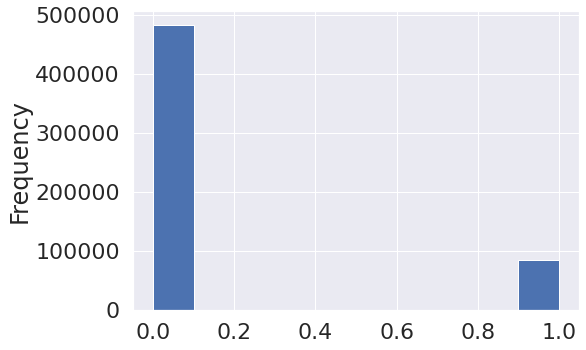

In [ ]:
target=train['HasDetections']
target.plot.hist()

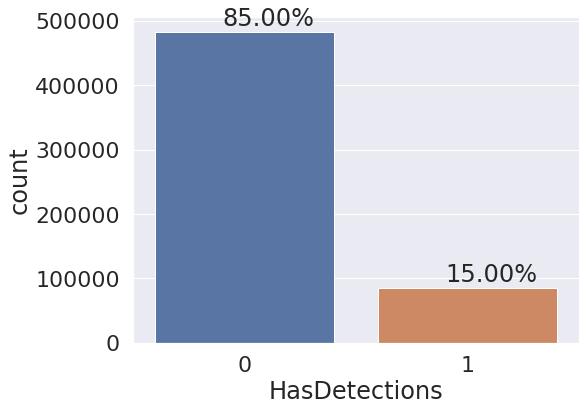

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot('HasDetections', data=train)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train['HasDetections'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

So we have a class imbalanced probelm at our hand.

# Exploratory Data Analysis 

### Missing Data

In [ ]:
pd.set_option('display.max_rows', 83)
print(train.isnull().sum())
pd.set_option('display.max_rows',None)

MachineIdentifier                                         0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                       2141
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            538189
AVProductStatesIdentifier                              2682
AVProductsInstalled                                    2682
AVProductsEnabled                                      2682
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        20711
OrganizationIdentifier                               176175
GeoNameIdentifier                       

#### Let's get a better look at missing values.

Missing Values in Training data set

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(45)

,Total,Percent
PuaMode,567626,99.981681
Census_ProcessorClass,565537,99.613725
DefaultBrowsersIdentifier,538189,94.796646
Census_IsFlightingInternal,469456,82.690011
Census_InternalBatteryType,400058,70.466243
Census_ThresholdOptIn,358394,63.127543
Census_IsWIMBootEnabled,357842,63.030314
SmartScreen,207184,36.493404
OrganizationIdentifier,176175,31.031476
SMode,38414,6.766245


Missing Values in Test Data set

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(45)

,Total,Percent
PuaMode,567626,99.981681
Census_ProcessorClass,565537,99.613725
DefaultBrowsersIdentifier,538189,94.796646
Census_IsFlightingInternal,469456,82.690011
Census_InternalBatteryType,400058,70.466243
Census_ThresholdOptIn,358394,63.127543
Census_IsWIMBootEnabled,357842,63.030314
SmartScreen,207184,36.493404
OrganizationIdentifier,176175,31.031476
SMode,38414,6.766245


### Checking Skewness

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
skewed = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in train.columns])
skewed = skewed.sort_values('skewness', ascending=False)
skewed

,column,uniq,skewness
28,PuaMode,1,100.00
75,Census_IsWIMBootEnabled,1,100.00
5,IsBeta,2,100.00
69,Census_IsFlightsDisabled,2,100.00
68,Census_IsFlightingInternal,2,100.00
27,AutoSampleOptIn,2,100.00
71,Census_ThresholdOptIn,2,99.97
65,Census_IsPortableOperatingSystem,2,99.95
29,SMode,2,99.93
35,Census_DeviceFamily,3,99.81


## non-numerical / categorical **data**

In [ ]:
# Creating a list to store non numerical (categorical) data of object type
objList = train.select_dtypes(include = "object").columns
print (objList)

Index([], dtype='object')


In [ ]:
# Printing number of categories in each column
for i in objList:
    print (i,len(train[i].unique()))

In [ ]:
# Visualizing columns having number of categories <= 9 since having large number of categories increases model computation expensive and 
#makes incorrect predictions
for i in objList:
    n = len(train[i].unique())
    ax = sns.countplot(x=i, hue="HasDetections", data=train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.figure(figsize = (50,50))
    plt.show()    

## Correlation

Visualizing Correlation of columns with target feature in groups of 10

In [ ]:
train['HasDetections'] = target

In [ ]:
cols = train.columns.tolist()

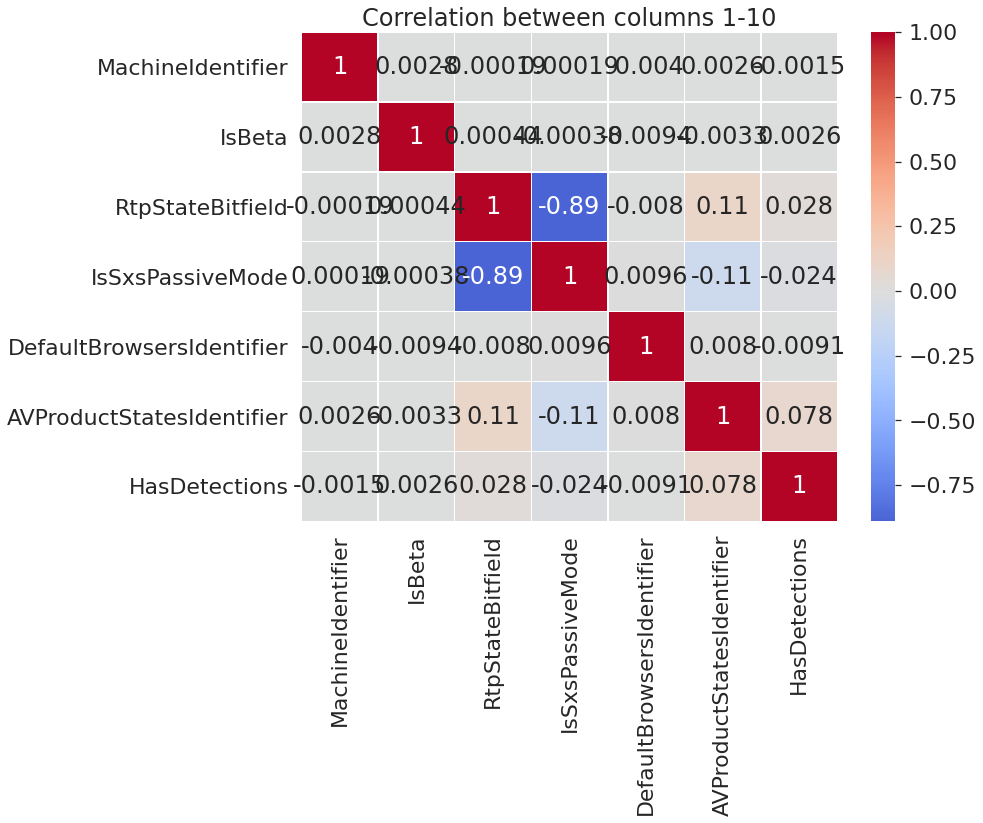

In [ ]:
plt.figure(figsize=(12,9))
corr_cols = cols[:10]
corr_cols.append('HasDetections')
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between columns 1-10')
plt.show()

Nothing significant we learn from this heatmap

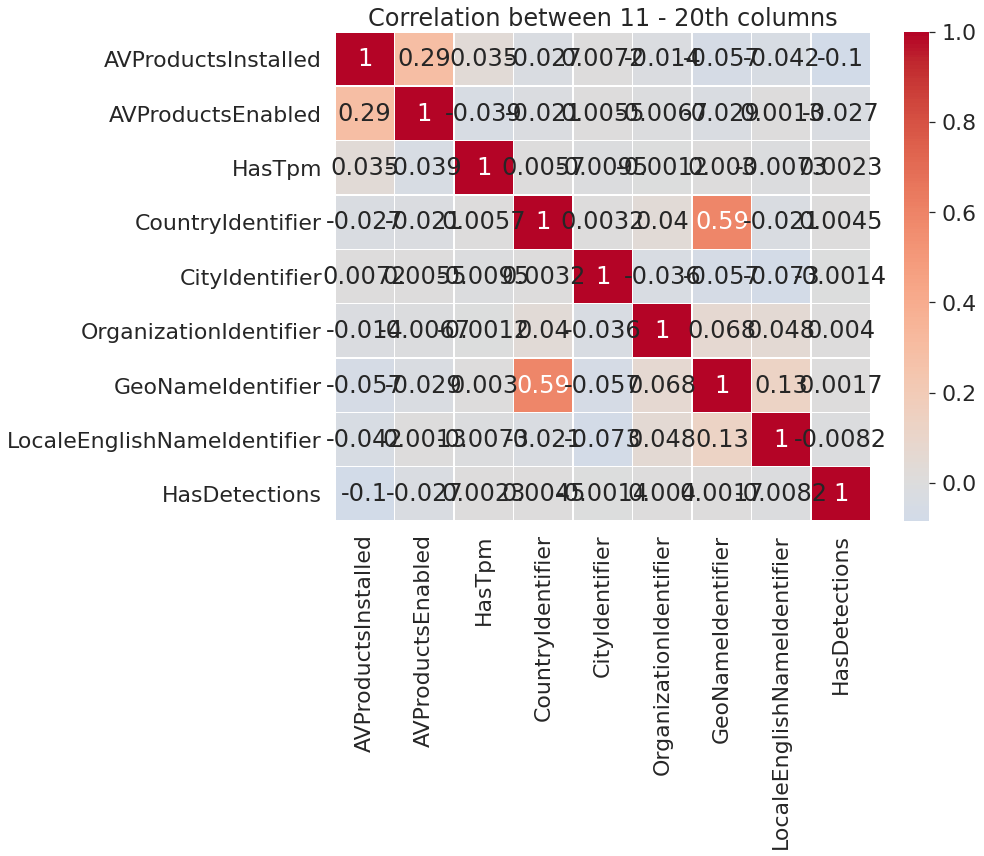

In [ ]:
corr_cols = cols[10:20]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,9))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 11 - 20th columns')
plt.show()

Platform has high correlation with 3 features. Let's see what values it contain.

In [ ]:
print(train.Platform.value_counts())
print(train.Platform.nunique())

windows10      548584
windows8        12047
windows7         6025
windows2016      1074
Name: Platform, dtype: int64
4


Most of the values are 0. We can safely drop this feature.

In [ ]:
print(train.OsBuild.value_counts())
print(train.OsBuild.nunique())

17134    242112
16299    161392
15063     51115
14393     48772
10586     27466
10240     17361
9600      12047
7601       5985
17692       202
17738       176
17744       160
17713        85
17758        82
17746        81
17751        69
17735        68
17754        64
17755        50
17763        46
17741        44
17760        41
7600         40
17733        39
17672        38
17686        36
17677        27
18234        22
17682        19
18237        13
17666        11
18242        10
17661        10
17730         9
17747         5
17723         5
17627         5
18219         4
17728         3
17711         3
17650         2
17704         2
17643         2
18204         1
17655         1
17639         1
17756         1
18214         1
17752         1
17749         1
Name: OsBuild, dtype: int64
49


In [ ]:
print(train.OsPlatformSubRelease.value_counts())
print(train.OsPlatformSubRelease.nunique())

rs4           242112
rs3           161392
rs2            51115
rs1            48772
th2            27466
th1            17361
windows8.1     12047
windows7        6025
prers5          1440
Name: OsPlatformSubRelease, dtype: int64
9


In [ ]:
print(train.IeVerIdentifier.value_counts())
print(train.IeVerIdentifier.nunique())

137.00    240256
117.00    113780
108.00     31007
111.00     29710
98.00      23291
135.00     14295
74.00      13986
53.00      13167
94.00      11457
105.00     10985
333.00      9402
107.00      8877
103.00      7887
96.00       5859
76.00       3710
114.00      2537
71.00       2488
323.00      2359
41.00       2190
335.00      1514
334.00      1364
87.00       1195
81.00        773
78.00        766
73.00        724
82.00        699
337.00       602
42.00        585
302.00       534
85.00        493
84.00        424
91.00        416
72.00        340
88.00        338
86.00        328
92.00        317
332.00       308
90.00        298
68.00        256
44.00        210
327.00       187
180.00       173
163.00       169
331.00       158
185.00       154
295.00       147
49.00        135
325.00       123
322.00       104
52.00         98
64.00         92
45.00         90
307.00        89
288.00        88
169.00        84
65.00         81
186.00        80
199.00        79
311.00        

We can delete only Platform feature.

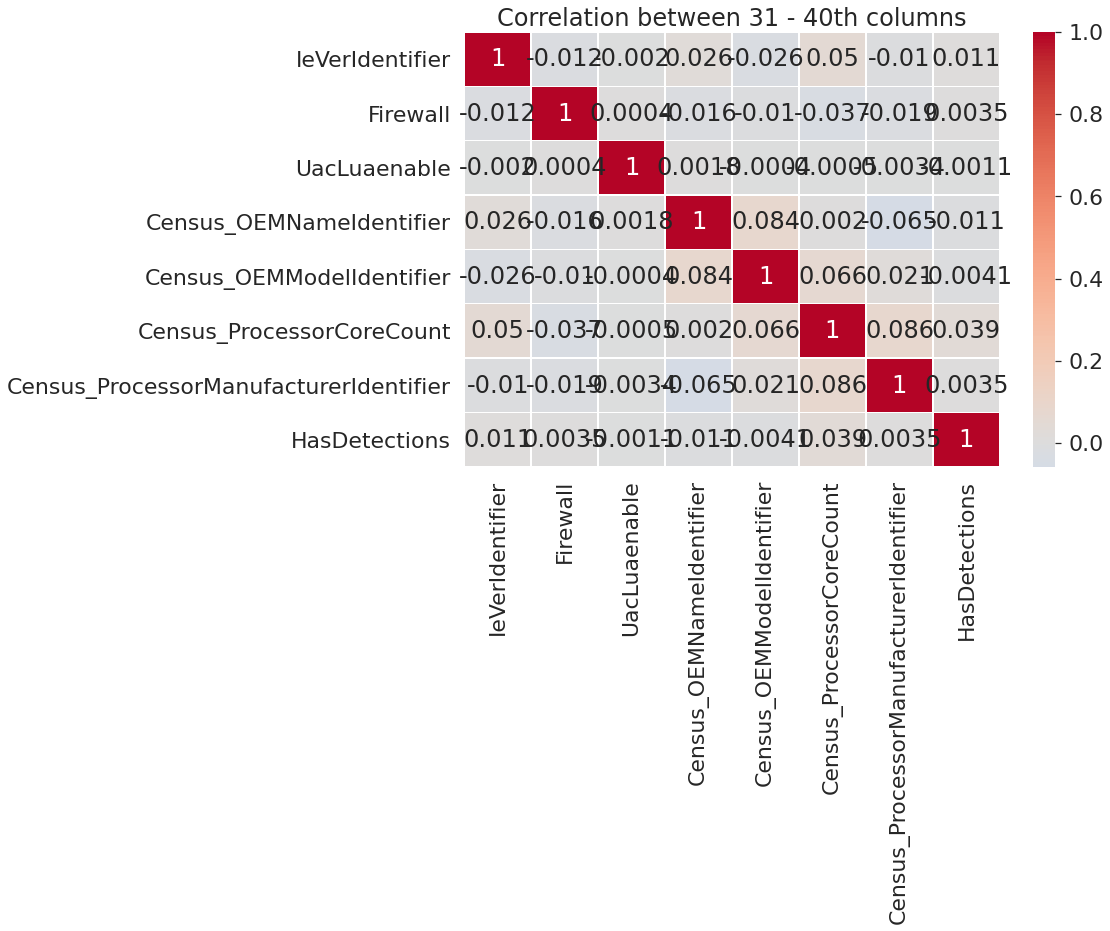

In [ ]:
corr_cols = cols[30:40]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,8))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 31 - 40th columns')
plt.show()

Nothing useful from this heatmap also.

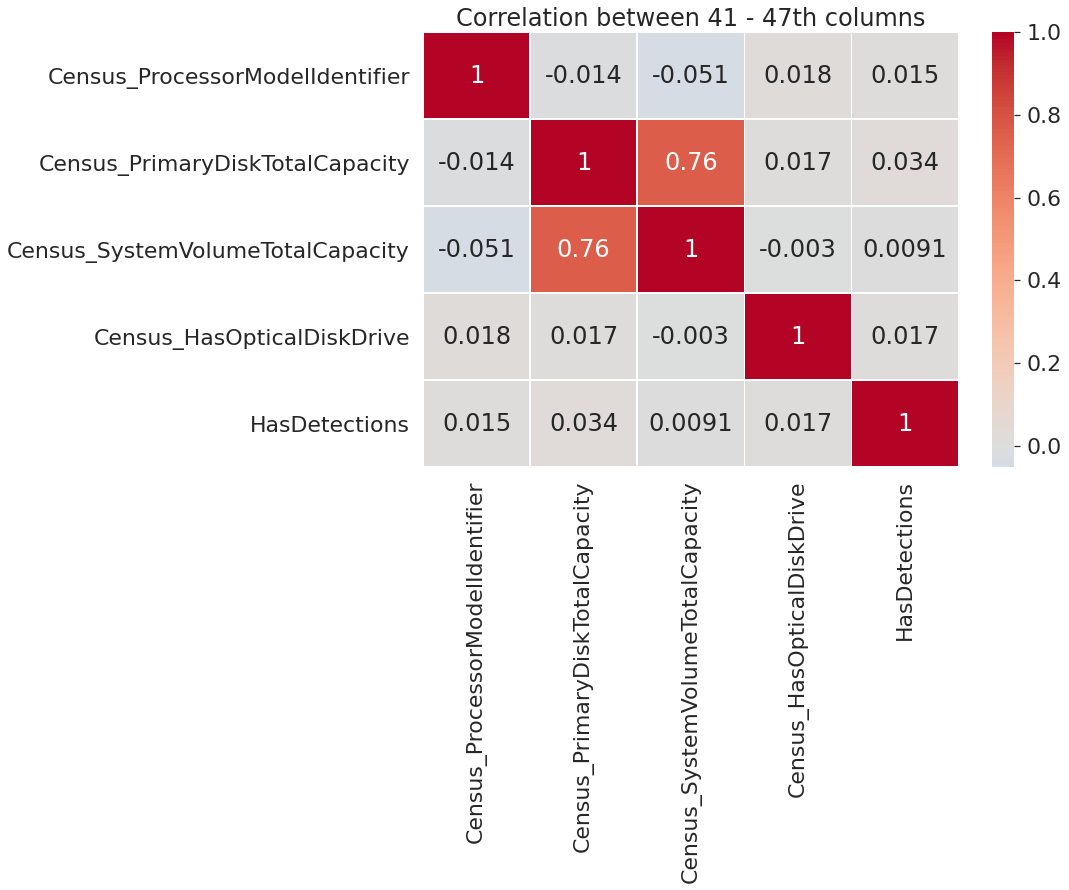

In [ ]:
corr_cols = cols[40:46]
corr_cols.append('HasDetections')
plt.figure(figsize=(12,8))
sns.heatmap(train[corr_cols].corr(), annot=True,center=0,linewidths=.5,cmap="coolwarm",robust=True)
plt.title('Correlation between 41 - 47th columns')
plt.show()

Let's inspect Census_IsTouchEnabled

In [ ]:
print(train.Census_IsTouchEnabled.value_counts())
print(train.Census_IsTouchEnabled.nunique())

0    491220
1     76510
Name: Census_IsTouchEnabled, dtype: int64
2


This seems like a binary feature. It will be useful in model training.

In [ ]:
print(train.shape)
print(test.shape)

(567730, 83)
(243313, 82)


# Model Ensembling

## Feature Engineering

In [ ]:
print('Transform all features to category.\n')
for usecol in train.columns.tolist()[1:-1]:

    train[usecol] = train[usecol].astype('str')
    test[usecol] = test[usecol].astype('str')
    
    #Fit LabelEncoder
    le = LabelEncoder().fit(
            np.unique(train[usecol].unique().tolist()+
                      test[usecol].unique().tolist()))

    #At the end 0 will be used for dropped values
    train[usecol] = le.transform(train[usecol])+1
    test[usecol]  = le.transform(test[usecol])+1

    agg_tr = (train
              .groupby([usecol])
              .aggregate({'MachineIdentifier':'count'})
              .reset_index()
              .rename({'MachineIdentifier':'Train'}, axis=1))
    agg_te = (test
              .groupby([usecol])
              .aggregate({'MachineIdentifier':'count'})
              .reset_index()
              .rename({'MachineIdentifier':'Test'}, axis=1))

    agg = pd.merge(agg_tr, agg_te, on=usecol, how='outer').replace(np.nan, 0)
    #Select values with more than 1000 observations
    agg = agg[(agg['Train'] > 1000)].reset_index(drop=True)
    agg['Total'] = agg['Train'] + agg['Test']
    #Drop unbalanced values
    agg = agg[(agg['Train'] / agg['Total'] > 0.2) & (agg['Train'] / agg['Total'] < 0.8)]
    agg[usecol+'Copy'] = agg[usecol]

    train[usecol] = (pd.merge(train[[usecol]], 
                              agg[[usecol, usecol+'Copy']], 
                              on=usecol, how='left')[usecol+'Copy']
                     .replace(np.nan, 0).astype('int').astype('category'))

    test[usecol]  = (pd.merge(test[[usecol]], 
                              agg[[usecol, usecol+'Copy']], 
                              on=usecol, how='left')[usecol+'Copy']
                     .replace(np.nan, 0).astype('int').astype('category'))

    del le, agg_tr, agg_te, agg, usecol
    gc.collect()
          
y_train = np.array(train['HasDetections'])
train_ids = train.index
test_ids  = test.index

del train['HasDetections'], train['MachineIdentifier'], test['MachineIdentifier']
gc.collect()

Transform all features to category.



0

In [ ]:
#Fit OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=True, dtype='uint8').fit(train)

#Transform data using small groups to reduce memory usage
m = 100000
train = vstack([ohe.transform(train[i*m:(i+1)*m]) for i in range(train.shape[0] // m + 1)])
test  = vstack([ohe.transform(test[i*m:(i+1)*m])  for i in range(test.shape[0] // m +  1)])

save_npz('train.npz', train, compressed=True)
save_npz('test.npz',  test,  compressed=True)

del ohe, train, test
gc.collect()

0

## Now Build the Stratified K Fold Model and generate predictions

In [ ]:
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
skf.get_n_splits(train_ids, y_train)
lgb_test_result_1  = np.zeros(test_ids.shape[0])
oof_1= np.zeros(train_ids.shape[0])

counter = 0

print('\nLightGBM\n')

for train_index, test_index in skf.split(train_ids, y_train):
    
    print('Fold {}\n'.format(counter + 1))
    
    train = load_npz('train.npz')
    X_fit = vstack([train[train_index[i*m:(i+1)*m]] for i in range(train_index.shape[0] // m + 1)])
    X_val = vstack([train[test_index[i*m:(i+1)*m]]  for i in range(test_index.shape[0] //  m + 1)])
    X_fit, X_val = csr_matrix(X_fit, dtype='float32'), csr_matrix(X_val, dtype='float32')
    y_fit, y_val = y_train[train_index], y_train[test_index]
    
    
    del train
    gc.collect()

    lgb_model = lgb.LGBMClassifier(max_depth=15,
                                   n_estimators=30000,
                                   learning_rate=0.03,
                                   num_leaves=2**12-1,
                                   colsample_bytree=0.28,
                                   objective='binary', 
                                   n_jobs=-1)
                               
    lgb_model.fit(X_fit, y_fit, eval_metric='auc', 
                  eval_set=[(X_val, y_val)], 
                  verbose=500, early_stopping_rounds=500)
                  
    oof_1[test_index] += lgb_model.predict_proba(X_val)[:,1]
    
    del X_fit, X_val, y_fit, y_val, train_index, test_index
    gc.collect()
    
    test = load_npz('test.npz')
    test = csr_matrix(test, dtype='float32')
    lgb_test_result_1 += lgb_model.predict_proba(test)[:,1]
    counter += 1
    
    del test
    gc.collect()


LightGBM

Fold 1

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's binary_logloss: 0.377015	valid_0's auc: 0.718028
[1000]	valid_0's binary_logloss: 0.377468	valid_0's auc: 0.716514
Early stopping, best iteration is:
[533]	valid_0's binary_logloss: 0.37693	valid_0's auc: 0.71825
Fold 2

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's binary_logloss: 0.376923	valid_0's auc: 0.718741
[1000]	valid_0's binary_logloss: 0.377189	valid_0's auc: 0.718234
Early stopping, best iteration is:
[591]	valid_0's binary_logloss: 0.376751	valid_0's auc: 0.719299
Fold 3

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's binary_logloss: 0.378414	valid_0's auc: 0.715744
[1000]	valid_0's binary_logloss: 0.378672	valid_0's auc: 0.71564
Early stopping, best iteration is:
[687]	valid_0's binary_logloss: 0.37825	valid_0's auc: 0.716303
Fold 4

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's 

## Now Build the K Fold Model and generate predictions

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['HasDetections'] = (lgb_test_result_1 / counter)
submission.to_csv('submission2.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission2.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>